In [1]:
import subprocess
import os
import sys
import matplotlib.backends.backend_pdf
import scanpy as sc
import matplotlib.pyplot as pl
import anndata as ad
import pandas as pd
import numpy as np
import seaborn as sns
import scvelo as scv
scv.settings.verbosity=1

from pathlib import Path

# Jupyter stuff
from tqdm.notebook import tqdm
from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

%matplotlib inline

# Custom functions
sys.path.insert(1, '../')
from utils import *

# scperturb package
sys.path.insert(1, '../package/src/')
from scperturb import *

from pathlib import Path
figure_path = Path('../figures/')

In [2]:
TEMPDIR = Path('/fast/scratch/users/peidlis_c/perturbation_resource_paper/')

In [3]:
# cd TEMPDIR
# wget -O GSE216481_RAW.tar 'http://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE216481&format=file'
# tar -xvf GSE216481_RAW.tar -C GSE216481_RAW

# mtx

In [13]:
keys = sorted([f.name.replace('_barcodes.tsv.gz', '') for f in path.glob('*_barcodes*')])

In [17]:
adata = sc.read_10x_mtx(path, prefix=keys[0]+'_')

In [18]:
adata

AnnData object with n_obs × n_vars = 10000 × 33538
    var: 'gene_ids', 'feature_types'

In [20]:
sorted([f.name for f in path.glob('*')])

['GSM6674255_191108_TFv2d56_4w_S1_barcodes.tsv.gz',
 'GSM6674255_191108_TFv2d56_4w_S1_features.tsv.gz',
 'GSM6674255_191108_TFv2d56_4w_S1_matrix.mtx.gz',
 'GSM6674256_191108_TFv2d56_4w_S2_barcodes.tsv.gz',
 'GSM6674256_191108_TFv2d56_4w_S2_features.tsv.gz',
 'GSM6674256_191108_TFv2d56_4w_S2_matrix.mtx.gz',
 'GSM6674257_191108_TFv2d56_8w_S1_barcodes.tsv.gz',
 'GSM6674257_191108_TFv2d56_8w_S1_features.tsv.gz',
 'GSM6674257_191108_TFv2d56_8w_S1_matrix.mtx.gz',
 'GSM6674258_191108_TFv2d56_8w_S2_barcodes.tsv.gz',
 'GSM6674258_191108_TFv2d56_8w_S2_features.tsv.gz',
 'GSM6674258_191108_TFv2d56_8w_S2_matrix.mtx.gz',
 'GSM6674380_200209_DS_S1_barcodes.tsv.gz',
 'GSM6674380_200209_DS_S1_features.tsv.gz',
 'GSM6674380_200209_DS_S1_matrix.mtx.gz',
 'GSM6674381_200209_DS_S2_barcodes.tsv.gz',
 'GSM6674381_200209_DS_S2_features.tsv.gz',
 'GSM6674381_200209_DS_S2_matrix.mtx.gz',
 'GSM6674382_200209_EB_S1_barcodes.tsv.gz',
 'GSM6674382_200209_EB_S1_features.tsv.gz',
 'GSM6674382_200209_EB_S1_matrix.mtx

In [26]:
df = pd.read_csv(path / 'GSM6719979_210322_TFmap_S10.csv.gz', index_col=0, header=None)

In [37]:
# get scRNA-seq from here!:
#https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE216463

,1,2
0,,
"R1.72,R2.27,R3.42",TGGTAGAGGGCCGAGAGCGTGTCG,14
"R1.94,R2.34,R3.60",GTCCATGGTCCATACGTGACGCAT,21
"R1.52,R2.85,R3.66",ACCCGTCGTTGCAATTGCATGCGA,407
"R1.02,R2.51,R3.77",TATTGCACTAGTGGCCGATGAGGA,82
"R1.49,R2.94,R3.02",ACGCGGTCCGTAGTCAGGATCCGC,417
...,...,...
"R1.45,R2.77,R3.35",ATATTTGCGGTGAGATGAGAGCAC,32
"R1.04,R2.69,R3.62",TCCAGAGCCTTCACGACGATCAGT,931
"R1.01,R2.45,R3.07",TTAACCATGCCACGCCTACATTGT,168


In [ ]:
# wget --recursive --no-parent -nd -R "index.html*" ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE216nnn/GSE216463/suppl/
# wget --recursive --no-parent -nd -R "index.html*" ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE216nnn/GSE216457/suppl/
# wget --recursive --no-parent -nd -R "index.html*" ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE216nnn/GSE216602/suppl/
# wget --recursive --no-parent -nd -R "index.html*" ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE216nnn/GSE216601/suppl/
# wget --recursive --no-parent -nd -R "index.html*" ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE216nnn/GSE216595/suppl/
# wget --recursive --no-parent -nd -R "index.html*" ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE217nnn/GSE217460/suppl/
# wget --recursive --no-parent -nd -R "index.html*" ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE217nnn/GSE217066/suppl/

In [23]:
GSE216463_keys = [x.name.replace('_matrix.mtx.gz', '') for x in TEMPDIR.glob('GSM66743*_matrix.mtx.gz')]
GSE216457_keys = [x.name.replace('_matrix.mtx.gz', '') for x in TEMPDIR.glob('GSM66742*_matrix.mtx.gz')]

In [34]:
GSE216463_keys

['GSM6674382_200209_EB_S1',
 'GSM6674381_200209_DS_S2',
 'GSM6674384_200209_RFX4_S1',
 'GSM6674380_200209_DS_S1',
 'GSM6674385_200209_RFX4_S2',
 'GSM6674383_200209_EB_S2']

In [29]:
adata = sc.read_10x_mtx(TEMPDIR, prefix=GSE216457_keys[0]+'_')

In [33]:
adata.var

,gene_ids,feature_types
MIR1302-2HG,ENSG00000243485,Gene Expression
FAM138A,ENSG00000237613,Gene Expression
OR4F5,ENSG00000186092,Gene Expression
AL627309.1,ENSG00000238009,Gene Expression
AL627309.3,ENSG00000239945,Gene Expression
...,...,...
AC233755.2,ENSG00000277856,Gene Expression
AC233755.1,ENSG00000275063,Gene Expression
AC240274.1,ENSG00000271254,Gene Expression
AC213203.1,ENSG00000277475,Gene Expression


In [30]:
bdata = sc.read_10x_mtx(TEMPDIR, prefix=GSE216463_keys[0]+'_')

In [32]:
bdata.obs

""
AAACCCAAGTGAGTTA-1
AAACCCACAACCGTAT-1
AAACCCACAACTCGTA-1
AAACCCACAGTCCCGA-1
AAACCCACATGGGAAC-1
...
TTTGTTGCACGACGCT-1
TTTGTTGCATATAGCC-1
TTTGTTGGTTTGTTCT-1
TTTGTTGTCGAGATGG-1


# H5ADs

In [7]:
[x.name for x in TEMPDIR.glob('*h5ad')]

['GSE217066_210715_combinatorial_subsample.h5ad',
 'GSE216602_180726_TFd56.h5ad',
 'GSE217066_210715_combinatorial.h5ad',
 'GSE217460_210322_TFAtlas_differentiated.h5ad',
 'GSE217460_210322_TFAtlas_differentiated_raw.h5ad',
 'GSE217460_210322_TFAtlas.h5ad',
 'GSE216595_180124_perturb.h5ad',
 'GSE216601_180525_CM.h5ad',
 'GSE216457_191108_TFv2d56.h5ad']

## GSE216457_191108_TFv2d56 (no TFs)

In [128]:
adata = sc.read(TEMPDIR / 'GSE216457_191108_TFv2d56.h5ad')

In [129]:
adata

AnnData object with n_obs × n_vars = 26111 × 1237
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

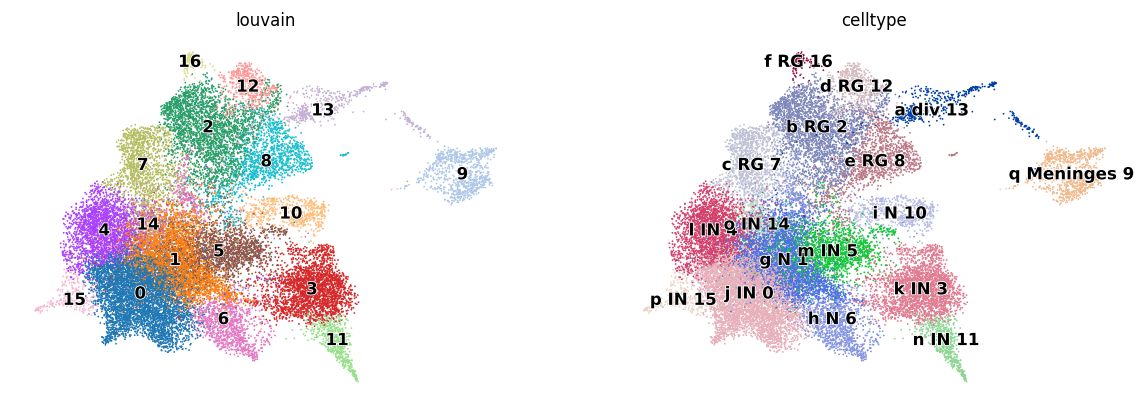

In [130]:
scv.pl.scatter(adata, dpi=120, color=['louvain', 'celltype'], legend_loc='on data')

## GSE217066_210715_combinatorial

In [5]:
adata = sc.read_h5ad(TEMPDIR / 'GSE217066_210715_combinatorial_subsample.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 30468 × 10096
    obs: 'n_genes', 'percent_mito', 'n_counts', 'batch', 'TF', 'batchTF', 'louvain'
    var: 'n_cells-0-0', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

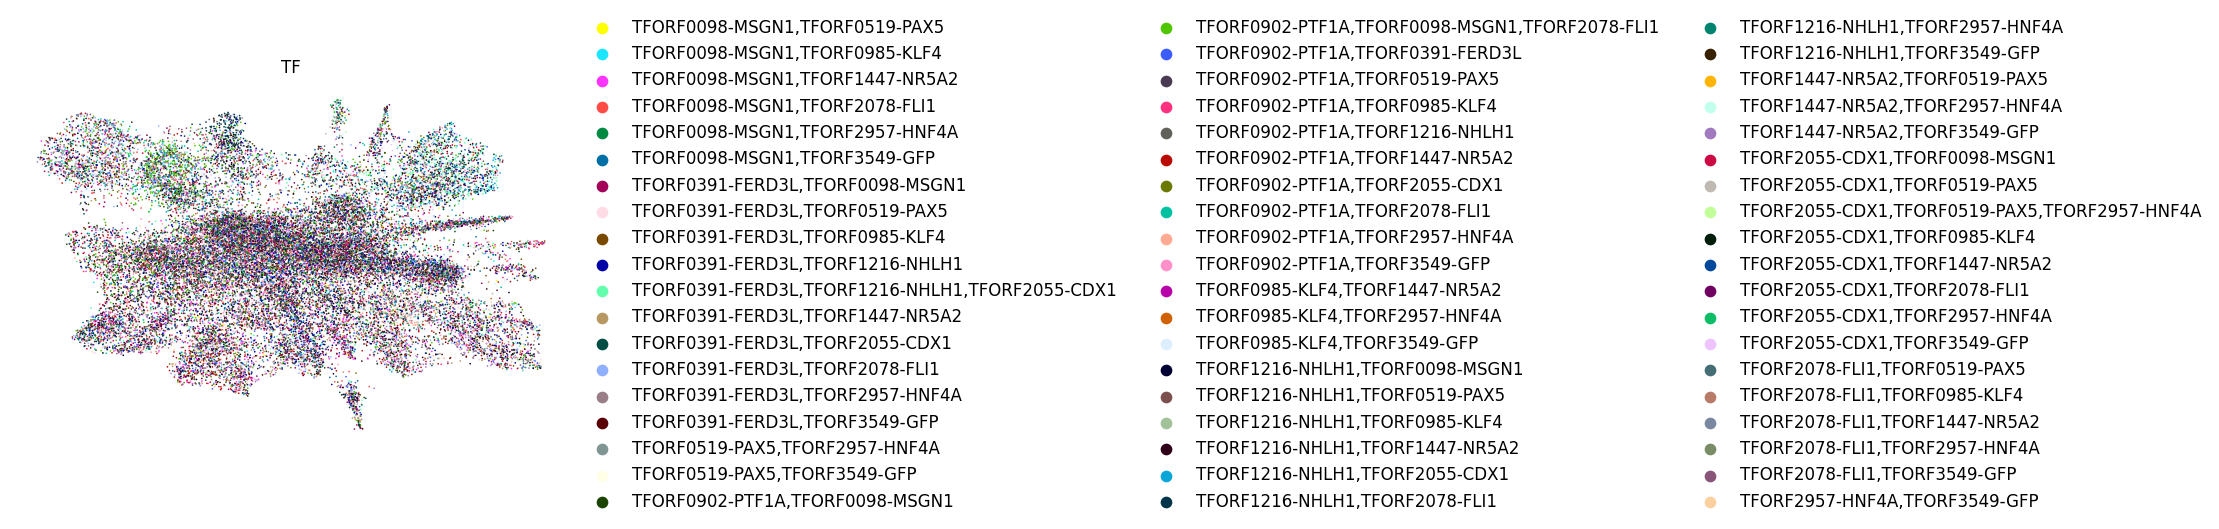

In [7]:
scv.pl.scatter(adata, basis='umap', color='TF', dpi=120, legend_loc='right margin')

In [19]:
import re
adata.obs['TF_'] = ['-'.join(sorted(re.sub(r'TFORF[0-9]{4}-', ' ', s).replace(' ','').split(','))) for s in adata.obs.TF]

In [20]:
sdata = equal_subsampling(adata, 'TF_', N_min=100)
ed = edist(sdata, 'TF_')
ed = cluster_matrix(ed, 'both')

100%|██████████| 41/41 [00:11<00:00,  3.55it/s]


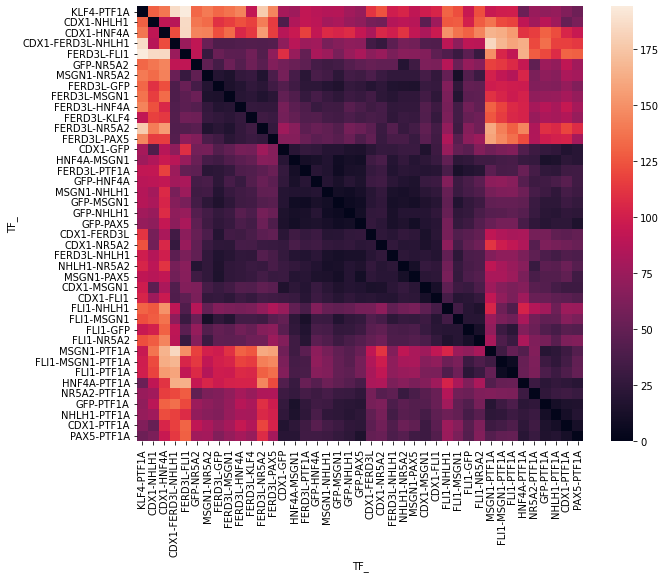

In [21]:
fig, ax = pl.subplots(1,1, figsize=[10,8])
sns.heatmap(ed)
pl.show()

## GSE217460_210322_TFAtlas_differentiated

In [65]:
# clusters 6,7,8 of differentiated cells
bdata = sc.read_h5ad(TEMPDIR / 'GSE217460_210322_TFAtlas_differentiated.h5ad')

In [66]:
bdata

AnnData object with n_obs × n_vars = 28825 × 4806
    obs: 'TF', 'batch', 'louvain', 'n_counts', 'n_genes', 'percent_mito'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'diffmap_evals', 'hvg', 'iroot', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_diffmap', 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

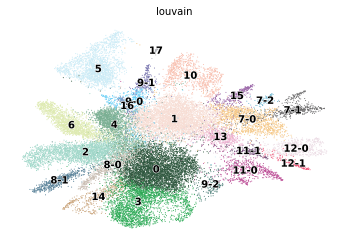

In [70]:
scv.pl.scatter(bdata, color='louvain', legend_loc='on data')

In [97]:
sorted(list([x.split('-',1)[-1] for x in bdata.obs.TF.unique()]))[-10:]

['ZSCAN31',
 'ZSCAN32',
 'ZSCAN5A',
 'ZSCAN5A',
 'ZSCAN9',
 'ZSCAN9',
 'ZXDA',
 'ZXDB',
 'ZZZ3',
 'mCherry']

In [105]:
bdata.obs['TF'] = [x.split('-',1)[1] for x in bdata.obs['TF']]
bdata.obs['TF_'] = bdata.obs.TF.copy().astype(str)
bdata.obs['TF_'][bdata.obs.TF.isin(['mCherry', 'GFP'])] = 'control'

In [106]:
sdata = equal_subsampling(bdata, 'TF', N_min=50)
ed = edist(sdata, 'TF')
ed = cluster_matrix(ed, 'both')

100%|██████████| 135/135 [00:37<00:00,  3.62it/s]


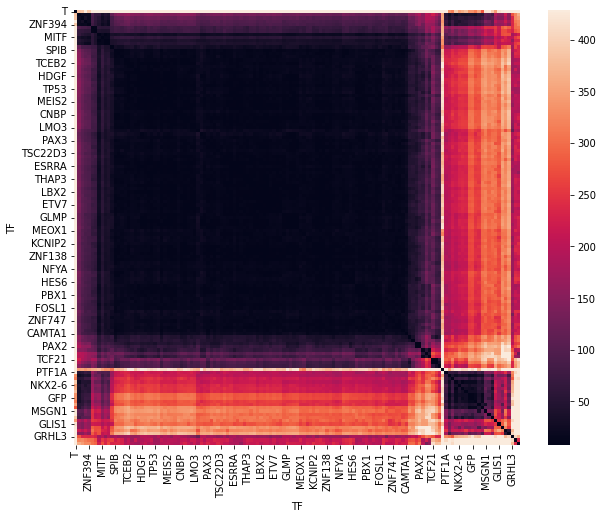

In [108]:
fig, ax = pl.subplots(1,1, figsize=[10,8])
sns.heatmap(ed, robust=True)
pl.show()

In [109]:
et = etest(sdata, 'TF_', control='control')

100%|██████████| 100/100 [00:06<00:00, 14.45it/s]


In [110]:
et

,edist,pvalue,significant,pvalue_adj,significant_adj
ASCL3,43.814369,0.00,True,0.0000,True
ASCL4,19.800642,0.00,True,0.0000,True
ATF3,306.181631,0.00,True,0.0000,True
ATOH7,24.479199,0.00,True,0.0000,True
BATF2,290.351385,0.00,True,0.0000,True
...,...,...,...,...,...
ZNF747,242.473264,0.00,True,0.0000,True
ZNF788,278.192942,0.00,True,0.0000,True
ZSCAN2,255.808771,0.00,True,0.0000,True
ZSCAN9,12.738147,0.19,False,0.3439,False


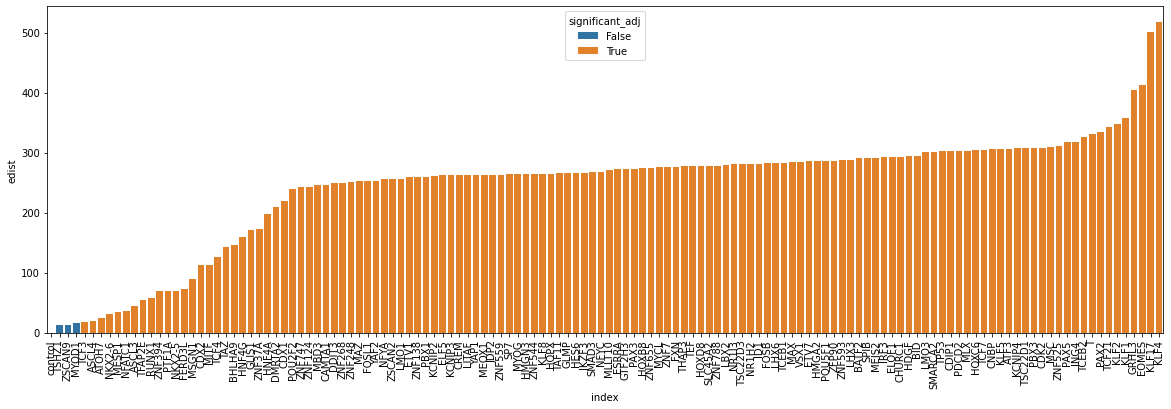

In [117]:
pl.figure(figsize=(20,6))
sns.barplot(data=et.reset_index(), x='index', y='edist', hue='significant_adj', dodge=False, order=et.sort_values('edist').index)
pl.xticks(rotation=90)
pl.show()

## GSE217460_210322_TFAtlas(_subsample) FAILS

In [3]:
import anndata as ad
ad.__version__

'0.8.0'

In [14]:
# this fails, tested in anndata v0.8.0
cdata = ad.read_h5ad(TEMPDIR / 'GSE217460_210322_TFAtlas.h5ad')

AnnDataReadError: Above error raised while reading key '/X' of type <class 'h5py._hl.dataset.Dataset'> from /.

In [4]:
# takes 3 mins
csdata = sc.read(TEMPDIR / 'GSE217460_210322_TFAtlas_subsample.h5ad')

## GSE216595_180124_perturb (no control)

In [136]:
# Fig S4I
ddata = sc.read(TEMPDIR / 'GSE216595_180124_perturb.h5ad')
ddata

AnnData object with n_obs × n_vars = 60997 × 5047
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'TF', 'louvain', 'temp'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'temp_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [148]:
sorted(list(ddata.obs.TF.unique()))

['ARX-NM_139058',
 'ASCL1-NM_004316',
 'BCL11A-NM_022893',
 'BCL11A-NM_138559',
 'BRIP1-NM_032043',
 'CDK1-NM_001170407',
 'CDK1-NM_001786',
 'CENPA-NM_001042426',
 'CHAF1A-NM_005483',
 'CXXC1-NM_014593',
 'E2F1-NM_005225',
 'E2F2-NM_004091',
 'E2F7-NM_203394',
 'E2F8-NM_001256372',
 'EGR1-NM_001964',
 'EMX2-NM_001165924',
 'EMX2-NM_004098',
 'ENO1-NM_001201483',
 'ENO1-NM_001428',
 'EOMES-NM_001278183',
 'EOMES-NM_005442',
 'FEZF2-NM_018008',
 'FOS-NM_005252',
 'FOXG1-NM_005249',
 'FOXM1-NM_001243089',
 'FOXM1-NM_202003',
 'FOXN4-NM_213596',
 'GLI3-NM_000168',
 'H2AFX-NM_002105',
 'HELLS-NM_001289068',
 'HELLS-NM_001289073',
 'HES1-NM_005524',
 'HES5-NM_001010926',
 'HMGB1-NM_002128',
 'HMGB2-NM_002129',
 'HOPX-NM_139212',
 'ID3-NM_002167',
 'ID4-NM_001546',
 'INSM1-NM_002196',
 'KLF15-NM_014079',
 'LHX2-NM_004789',
 'MAZ-NM_001276275',
 'MAZ-NM_001276276',
 'MEIS1-NM_002398',
 'MXD3-NM_001142935',
 'MXD3-NM_031300',
 'MYBL2-NM_001278610',
 'NFATC4-NM_001198966',
 'NFATC4-NM_001288802

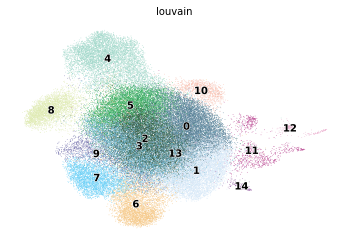

In [141]:
scv.pl.scatter(ddata, color='louvain')

## GSE216601_180525_CM (no ORFs)

In [137]:
# Fig S5F
edata = sc.read(TEMPDIR / 'GSE216601_180525_CM.h5ad')
edata

AnnData object with n_obs × n_vars = 16698 × 3579
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

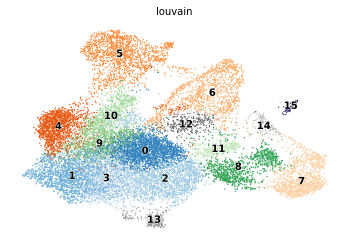

In [142]:
scv.pl.scatter(edata, color='louvain')